<img src="../images/handleMissingvalues.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("../Datasets/data_science_job.csv")
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
3105,28611,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,Pvt Ltd,61.0,1.0
1037,28042,city_114,0.926,Male,No relevent experience,Part time course,Graduate,STEM,5.0,10000+,Pvt Ltd,58.0,0.0
10901,877,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,100-500,Pvt Ltd,167.0,0.0
16133,24492,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12.0,10/49,Pvt Ltd,67.0,0.0
10088,25486,city_36,0.893,NaN,No relevent experience,no_enrollment,High School,NaN,5.0,NaN,NaN,10.0,0.0


In [4]:
df.isnull().mean()*100 # it shows how many percent data is missing from each col

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols=[i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0.00]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1267,0.698,no_enrollment,High School,1.0,98.0
9482,0.920,no_enrollment,Masters,4.0,96.0
7930,0.920,no_enrollment,Graduate,15.0,52.0
7835,0.893,no_enrollment,Masters,20.0,17.0
8760,0.897,no_enrollment,Masters,6.0,81.0


In [10]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [15]:
new_df=df[cols].dropna()

C:\Users\panka\AppData\Local\Temp\ipykernel_19288\2694084501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["city_development_index"],color="green")
C:\Users\panka\AppData\Local\Temp\ipykernel_19288\2694084501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["city_development_i

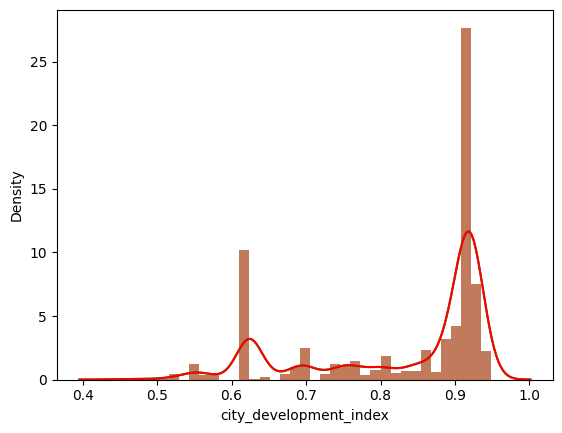

In [21]:
# for comparing distibution for numerical colums
sns.distplot(df["city_development_index"],color="green")
sns.distplot(new_df["city_development_index"],color="red")
plt.show()

In [25]:
# for comparing distibution for categorical colums we check ratio of columns before and after

temp=pd.concat([df["education_level"].value_counts()/len(df),
               new_df["education_level"].value_counts()/len(new_df)],axis=1)
temp.columns=["orignal","cca"]
temp

,orignal,cca
education_level,,
Graduate,0.555904,0.619835
Masters,0.209938,0.234082
High School,0.096304,0.107380
Phd,0.019835,0.022116
Primary School,0.014876,0.016587
